In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
## Read the Dataset

df=pd.read_csv(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


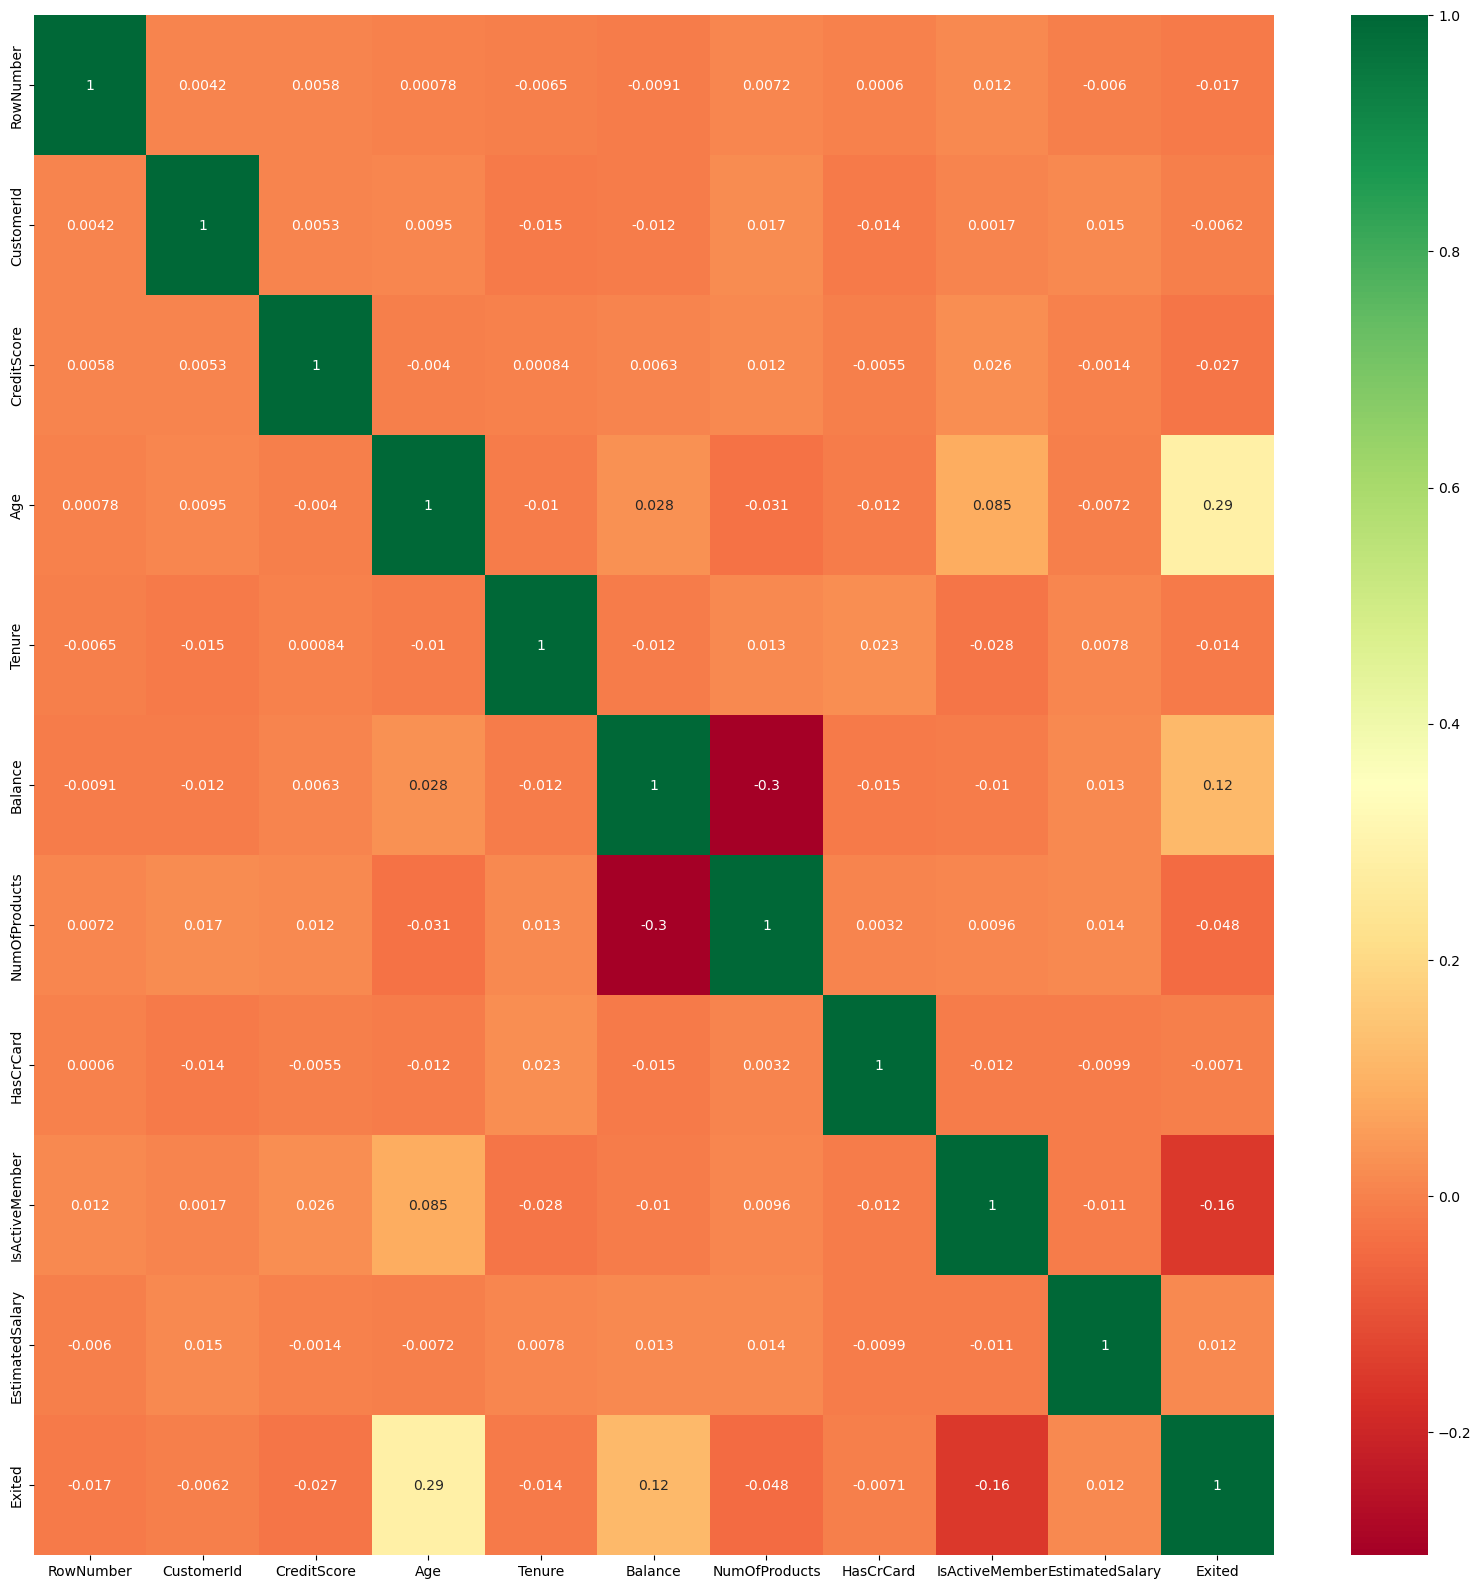

In [3]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
#Get the Independent and Dependent Features
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
## Drop Categorical Features
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [39]:
## Hyper Parameter Optimization

params={
    "n_estimators" : [2,4,6,8,10,12,14,16,32,64,90,100],
    "criterion" : ["gini", "entropy"],
    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "max_features" : ["sqrt", "log2","auto"]
}

In [13]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
model=RandomForestClassifier()

In [40]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [41]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 8.28 seconds.


In [42]:
random_search.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=90)

In [43]:
random_search.best_params_

{'n_estimators': 90,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'gini'}

In [27]:
classifier =  RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=64,oob_score=True)

In [29]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=64,
                       oob_score=True)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Test data accuracy: 0.863


In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_test,y_test,cv=10)

In [33]:
score

array([0.88 , 0.84 , 0.865, 0.84 , 0.815, 0.845, 0.84 , 0.88 , 0.845,
       0.845])

In [34]:
score.mean()

0.8494999999999999

In [37]:
classifier.score(X_test,y_test)

0.863

In [38]:
print(classifier.oob_score_)

0.862125
